## Crop & Fertilizer Recommendation Using ML

In [ ]:
# Necessary Libraries ->

import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score # Better for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# To save/load model
import joblib


In [61]:
# File Paths 
crop_data = 'data/Crop_recommendation.csv'
fertilizer_data = 'data/Fertilizer Prediction.csv'

In [62]:
#loading the dataset
crop = pd.read_csv(crop_data)

In [63]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [64]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [65]:
crop.shape

(2200, 8)

In [66]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [67]:
#to check for missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [68]:
#to check the statistical summary
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [69]:
#to check the target feature distribution
crop['label'].value_counts()


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [70]:
print(f"Shape of the crop dataset: {crop.shape}", end="\n \n")

print(f"Number of unique crops: {crop['label'].nunique()}", end="\n \n")

print(f"Columns in the dataset: {crop.columns}", end="\n \n")

print(f"Types of crop labels: {crop['label'].unique()}", end="\n \n")

print(f"Numeric Columns: {crop.select_dtypes(include=np.number).columns.tolist()}", end="\n \n")

print(f"Missing Value Sum: {crop.isnull().sum().sum()}", end="\n \n")
print(f"Duplicate Rows Count: {crop.duplicated().sum()}")

Shape of the crop dataset: (2200, 8)
 
Number of unique crops: 22
 
Columns in the dataset: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
 
Types of crop labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
 
Numeric Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
 
Missing Value Sum: 0
 
Duplicate Rows Count: 0


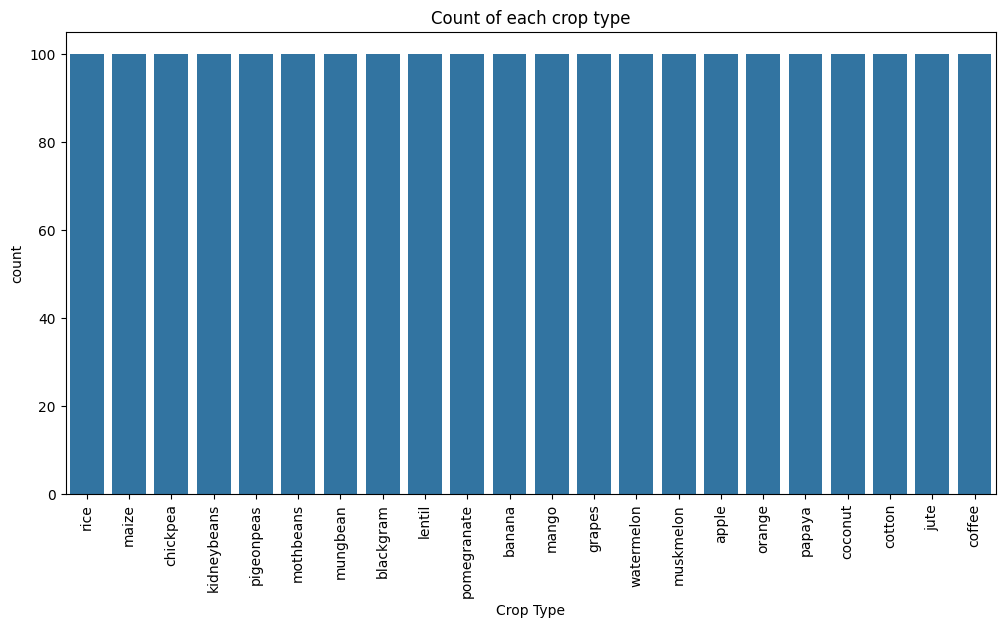

In [71]:
# Count of each crop type as a count plot

plt.figure(figsize=(12,6))
sns.countplot(data=crop, x="label")
plt.xlabel("Crop Type")
plt.xticks(rotation=90) # To make sure that the labels don't overlap
plt.title("Count of each crop type")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

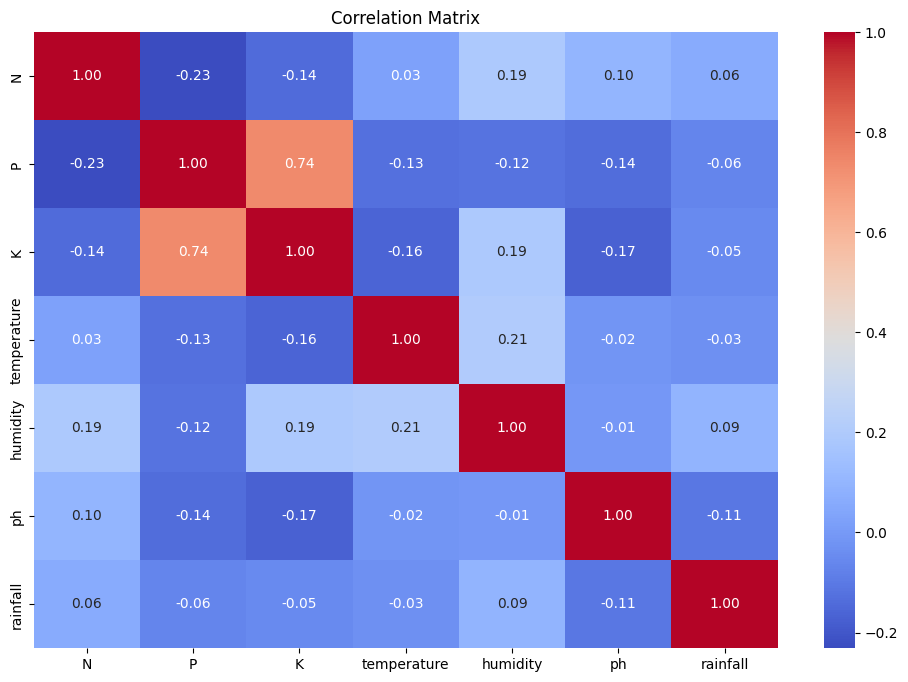

In [72]:
# Correlation Matrix 

# Numeric columns only

crop_numeric = crop.select_dtypes(include=np.number)

corr = crop_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,fmt=".2f" , cmap='coolwarm')
plt.title("Correlation Matrix")

In [73]:
# Splitting the data

X = crop.drop(columns=['label'])
y = crop['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42, stratify=y)


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9954545454545455
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      

Accuracy: 0.9954545454545455
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      

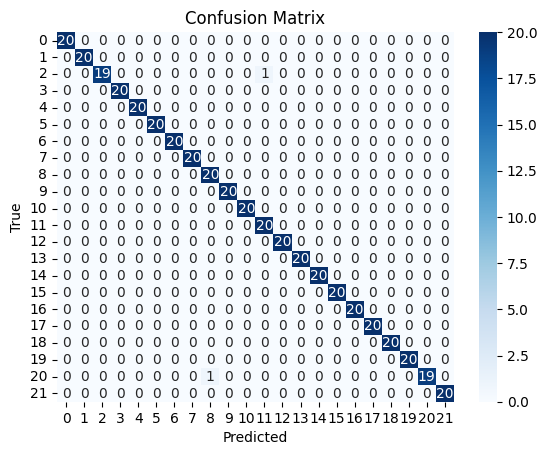

In [ ]:


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=skf)
print("CV scores:", scores)
print("Mean CV score:", np.mean(scores))

CV scores: [0.99545455 0.99318182 1.         0.99772727 0.99090909]
Mean CV score: 0.9954545454545455


In [83]:
# Save the model
joblib.dump(rf_model, 'model/crop_model.pkl', )
# Save the scaler if used
joblib.dump(scaler, 'model/crop_scaler.pkl')


['model/crop_scaler.pkl']

In [ ]:
# Load
rf_model_loaded = joblib.load('model/crop_model.pkl')
scaler_loaded = joblib.load('model/crop_scaler.pkl')


In [79]:
# Example new data (one row)
sample = [[90, 42, 43, 20.0, 80.0, 6.0, 200.0]]  # [N, P, K, temperature, humidity, pH, rainfall]
sample_scaled = scaler_loaded.transform(sample)
crop_pred = rf_model_loaded.predict(sample_scaled)
print("Recommended crop:", crop_pred[0])


Recommended crop: 20


/var/data/python/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
fert_data_path = 'Dataset/Fertilizer Prediction.csv'
df_fert = pd.read_csv(fert_data_path)

df_fert.head()
df_fert.info()
df_fert.isnull().sum()


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/Fertilizer Prediction.csv'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example for label encoding
le_crop = LabelEncoder()
le_soil = LabelEncoder()
le_fert = LabelEncoder()

df_fert['CropType'] = le_crop.fit_transform(df_fert['CropType'])
df_fert['SoilType'] = le_soil.fit_transform(df_fert['SoilType'])
df_fert['CurrentDeficiency'] = le_fert.fit_transform(df_fert['CurrentDeficiency'])


KeyError: 'RecommendedFertilizer'

In [ ]:
# main.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Load crop data
df_crop = pd.read_csv('Dataset/Crop_recommendation.csv')
X_crop = df_crop.drop('label', axis=1)
y_crop = df_crop['label']

# 2. Train-test split
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop, 
    test_size=0.2, 
    random_state=42
)

# 3. Train RandomForest
rf_crop = RandomForestClassifier(n_estimators=100, random_state=42)
rf_crop.fit(X_train_crop, y_train_crop)
y_pred_crop = rf_crop.predict(X_test_crop)

# 4. Evaluate
print("Crop Model Accuracy:", accuracy_score(y_test_crop, y_pred_crop))
print("Classification Report (Crop):")
print(classification_report(y_test_crop, y_pred_crop))

# 5. Save model
joblib.dump(rf_crop, 'crop_model.pkl')

# Repeat similar steps for fertilizer
df_fert = pd.read_csv('Dataset/Fertilizer Prediction.csv')

# Suppose your columns: 
# [CropType, SoilType, N, P, K, CurrentDeficiency, RecommendedFertilizer]
X_fert = df_fert.drop('RecommendedFertilizer', axis=1)
y_fert = df_fert['RecommendedFertilizer']

X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(
    X_fert, y_fert, 
    test_size=0.2, 
    random_state=42
)

rf_fert = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fert.fit(X_train_fert, y_train_fert)
y_pred_fert = rf_fert.predict(X_test_fert)

print("Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_fert))
print("Classification Report (Fertilizer):")
print(classification_report(y_test_fert, y_pred_fert))

joblib.dump(rf_fert, 'fertilizer_model.pkl')

print("Models saved successfully!")


Crop Model Accuracy: 0.9931818181818182
Classification Report (Crop):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orang

KeyError: "['RecommendedFertilizer'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the fertilizer dataset
fert_data_path = 'Dataset/Fertilizer Prediction.csv'  # Ensure the path is correct
df_fert = pd.read_csv(fert_data_path)

# Standardize column names: remove spaces and convert to lowercase
df_fert.columns = df_fert.columns.str.strip().str.lower()

# Display the standardized columns
print("Standardized Columns:")
print(df_fert.columns.tolist())

# Verify if 'recommended fertilizer' exists
if 'recommended fertilizer' not in df_fert.columns:
    # Attempt to find a close match
    possible_cols = [col for col in df_fert.columns if 'fertilizer' in col]
    if possible_cols:
        target_col = possible_cols[0]
        print(f"Using '{target_col}' as the target column.")
    else:
        raise KeyError("No column related to 'Recommended Fertilizer' found in the dataset.")
else:
    target_col = 'recommended fertilizer'

# Prepare features and target
X_fert = df_fert.drop(target_col, axis=1)
y_fert = df_fert[target_col]

# (Optional) Handle categorical variables if present
# For example, 'crop type' and 'soil type' might be categorical
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le_crop = LabelEncoder()
le_soil = LabelEncoder()

# Encode 'crop type' and 'soil type'
if 'crop type' in X_fert.columns:
    X_fert['crop type'] = le_crop.fit_transform(X_fert['crop type'])
if 'soil type' in X_fert.columns:
    X_fert['soil type'] = le_soil.fit_transform(X_fert['soil type'])

# If 'current deficiency' exists and needs encoding
if 'current deficiency' in X_fert.columns:
    le_def = LabelEncoder()
    X_fert['current deficiency'] = le_def.fit_transform(X_fert['current deficiency'])

# Split into training and testing sets
X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(
    X_fert, y_fert, 
    test_size=0.2, 
    random_state=42,
    stratify=y_fert
)

# Initialize and train the Random Forest Classifier
rf_fert = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fert.fit(X_train_fert, y_train_fert)

# Make predictions
y_pred_fert = rf_fert.predict(X_test_fert)

# Evaluate the model
print("Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_fert))
print("Classification Report (Fertilizer):")
print(classification_report(y_test_fert, y_pred_fert))

# Save the fertilizer model
joblib.dump(rf_fert, 'fertilizer_model.pkl')

print("Fertilizer model trained and saved successfully!")


Standardized Columns:
['temparature', 'humidity', 'moisture', 'soil type', 'crop type', 'nitrogen', 'potassium', 'phosphorous', 'fertilizer name']
Using 'fertilizer name' as the target column.
Fertilizer Model Accuracy: 1.0
Classification Report (Fertilizer):
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Fertilizer model trained and saved successfully!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train_fert, y_train_fert)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf_fert = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_fert.predict(X_test_fert)
print("Optimized Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_best))
print("Classification Report (Optimized Fertilizer):")
print(classification_report(y_test_fert, y_pred_best))

# Save the optimized model
joblib.dump(best_rf_fert, 'fertilizer_model_optimized.pkl')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Fertilizer Model Accuracy: 1.0
Classification Report (Optimized Fertilizer):
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



['fertilizer_model_optimized.pkl']